In [8]:
import h5py

h5_path = "../data/camels_LH.hdf5"
snap = 90

with h5py.File(h5_path, "r") as f:
    g = f[f"snap_{snap:03d}"]
    print("snap attrs:", dict(g.attrs))

    star_mass = g["SubhaloStellarMass"]
    print("SubhaloStellarMass shape:", star_mass.shape, "dtype:", star_mass.dtype)
    star_mass_sample = star_mass[0]
    print("SubhaloStellarMass sample shape:", star_mass_sample.shape)

    assert "smf" in g, "missing group snap_XXX/smf"
    smf = g["smf"]

    print("smf attrs:", dict(smf.attrs))
    print("datasets:", list(smf.keys()))
    print("smf shape:", smf["phi"].shape, "dtype:", smf["phi"].dtype)
    print("logM shape:", smf["logM"].shape, "dtype:", smf["logM"].dtype)

snap attrs: {'Redshift': np.float64(2.220446049250313e-16), 'h': np.float64(0.6711), 'snap': np.int64(90)}
SubhaloStellarMass shape: (1000,) dtype: object
SubhaloStellarMass sample shape: (15712,)
smf attrs: {'Redshift': np.float64(2.220446049250313e-16), 'bins': np.int64(13), 'box_size': np.float64(37.2522723886157), 'mass_range_high': np.float64(11.50005), 'mass_range_low': np.float64(8.79995)}
datasets: ['logM', 'phi']
smf shape: (1000, 13) dtype: float32
logM shape: (13,) dtype: float64


In [3]:
i = 7
with h5py.File("../data/camels_LH.hdf5", "r") as f:
    p = f["lh_params"]
    print(
        p["Omega_m"][i],
        p["sigma_8"][i],
        p["A_SN1"][i],
        p["A_AGN1"][i],
        p["A_SN2"][i],
        p["A_AGN2"][i],
    )
    print("All LH params:", {key: p[key][i] for key in p.keys()})

0.4926 0.7422 1.89474 0.44319 0.79719 1.19168
All LH params: {'A_AGN1': np.float32(0.44319), 'A_AGN2': np.float32(1.19168), 'A_SN1': np.float32(1.89474), 'A_SN2': np.float32(0.79719), 'Omega_m': np.float32(0.4926), 'sigma_8': np.float32(0.7422)}


/tmp/ipykernel_2602685/2120814916.py:13: RuntimeWarning: divide by zero encountered in log10
  phi_ds = np.log10(smf['phi'])


Found 1000 sims, plotting first 1000 samples


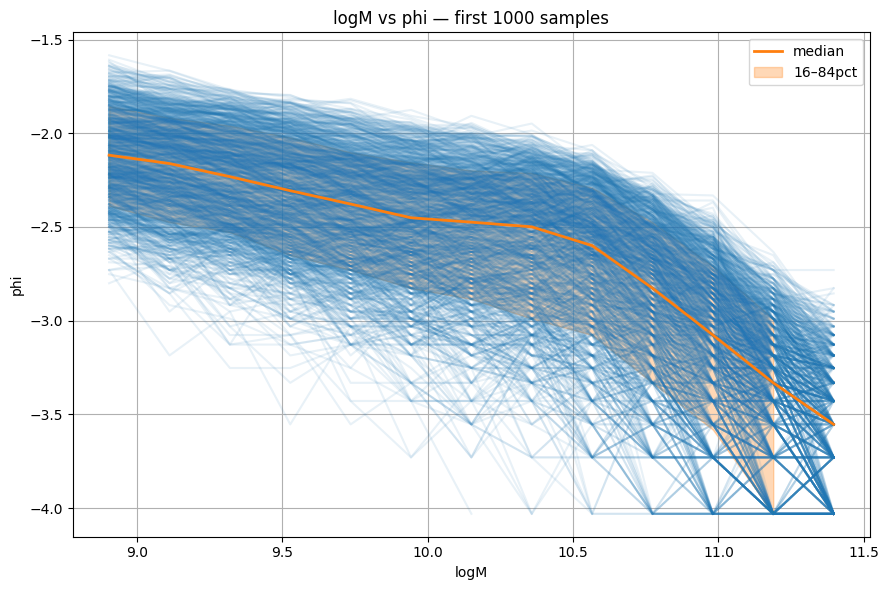

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

h5_path = "../data/camels_LH.hdf5"
snap = 90
n_samples = 1000

with h5py.File(h5_path, 'r') as f:
    g = f[f"snap_{snap:03d}"]
    smf = g['smf']
    logM = np.array(smf['logM'])
    phi_ds = np.log10(smf['phi'])
    n_available = phi_ds.shape[0]
    n = min(n_samples, n_available)
    print(f"Found {n_available} sims, plotting first {n} samples")
    phi = np.array(phi_ds[:n])  # shape (n, nbins)

# sanity check bins
nbins = phi.shape[1]
assert logM.shape[0] == nbins, f"logM bins ({logM.shape[0]}) != phi bins ({nbins})"

plt.figure(figsize=(9,6))
for i in range(n):
    plt.plot(logM, phi[i], color='C0', alpha=0.1)

median = np.median(phi, axis=0)
p16 = np.percentile(phi, 16, axis=0)
p84 = np.percentile(phi, 84, axis=0)

plt.plot(logM, median, color='C1', lw=2, label='median')
plt.fill_between(logM, p16, p84, color='C1', alpha=0.3, label='16–84pct')
plt.xlabel('logM')
plt.ylabel('phi')
plt.title(f'logM vs phi — first {n} samples')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()